In [2]:
import numpy as np
import pandas as pd
from yaml import safe_load #For converting the yaml data to pandas dataframe
import os
from tqdm import tqdm  #Simple tool to add progree bars to loops and iterable objects

In [3]:
filenames=[]
for file in os.listdir("T20 Data"):   #listdir returns a list of all files and directories in the specified directory.
    filenames.append(os.path.join("T20 Data",file)) #Contructs a full path of each file by joining the directory name with the filename

In [4]:
filenames[0:3]

['T20 Data/1173055.yaml', 'T20 Data/951375.yaml', 'T20 Data/1188621.yaml']

In [5]:
original_df = pd.DataFrame()
count = 1

for file in tqdm(filenames):
    try:
        with open(file, 'r', encoding='utf-8') as f:
            df = pd.json_normalize(safe_load(f))  # Converting to json files using safe_load to handle yaml data
            df['match_id'] = count
            original_df = pd.concat([original_df, df], ignore_index=True)
            count += 1
    except UnicodeDecodeError:
        print(f"UnicodeDecodeError: Unable to decode file '{file}', skipping...")
        continue

original_df


 15%|█▍        | 211/1433 [00:18<01:26, 14.13it/s]

UnicodeDecodeError: Unable to decode file 'T20 Data/.DS_Store', skipping...


100%|██████████| 1433/1433 [02:12<00:00, 10.83it/s]


,innings,meta.data_version,meta.created,meta.revision,info.city,info.dates,info.gender,info.match_type,info.match_type_number,info.outcome.winner,...,match_id,info.outcome.by.runs,info.neutral_venue,info.outcome.method,info.outcome.result,info.outcome.eliminator,info.bowl_out,info.outcome.bowl_out,info.supersubs.New Zealand,info.supersubs.South Africa
0,"[{'1st innings': {'team': 'West Indies', 'deli...",0.9,2020-03-01,1,Canberra,[2020-02-26],female,T20,853.0,Pakistan,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[{'1st innings': {'team': 'India', 'deliveries...",0.9,2016-03-17,2,Bangalore,[2016-03-15],female,T20,NaN,India,...,2,72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"[{'1st innings': {'team': 'West Indies', 'deli...",0.9,2019-08-06,1,Lauderhill,[2019-08-03],male,T20,842.0,India,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"[{'1st innings': {'team': 'West Indies', 'deli...",0.9,2012-04-16,2,St Lucia,[2012-03-27],male,T20,NaN,Australia,...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"[{'1st innings': {'team': 'India', 'deliveries...",0.9,2017-02-13,1,Bangalore,[2017-02-01],male,T20,NaN,India,...,5,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1427,"[{'1st innings': {'team': 'Afghanistan', 'deli...",0.9,2019-09-30,1,Chattogram,[2019-09-20],male,T20,890.0,Zimbabwe,...,1428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1428,"[{'1st innings': {'team': 'Namibia', 'deliveri...",0.9,2019-09-07,1,Arbroath,[2019-09-03],female,T20,742.0,Netherlands,...,1429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1429,"[{'1st innings': {'team': 'Canada', 'deliverie...",0.9,2019-08-26,1,Hamilton,[2019-08-25],male,T20,865.0,Canada,...,1430,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1430,"[{'1st innings': {'team': 'Pakistan', 'deliver...",0.9,2020-12-18,1,Auckland,[2020-12-18],male,T20,1117.0,New Zealand,...,1431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
backup_original_df=original_df.copy() # Normally if backup_original_df=original_df is given , it is call by reference


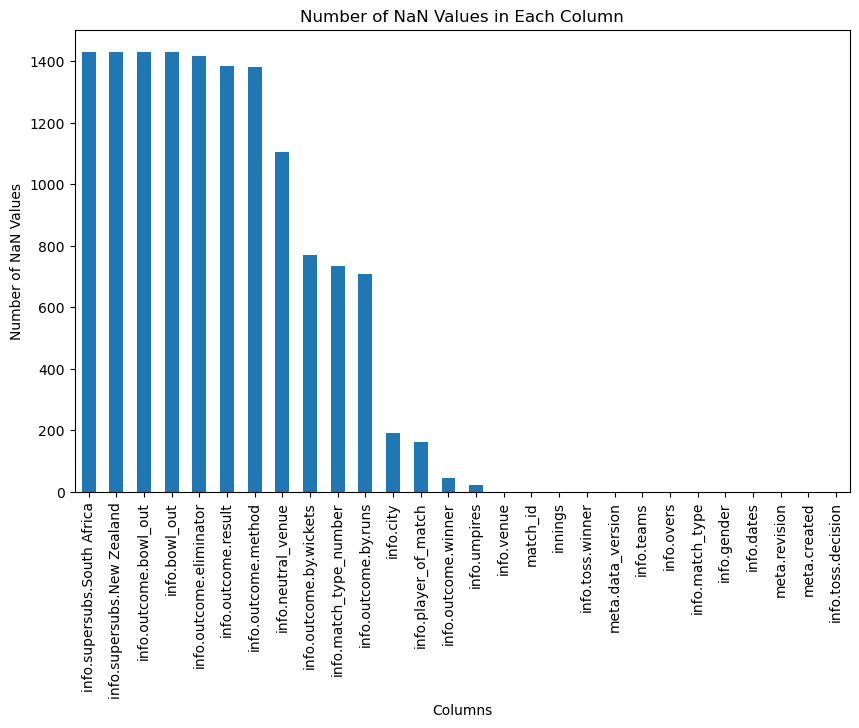

In [7]:
import matplotlib.pyplot as plt

# Calculate the number of NaN values in each column
nan_counts = original_df.isna().sum()

# Sort columns by the number of NaN values
nan_counts_sorted = nan_counts.sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
nan_counts_sorted.plot(kind='bar')
plt.title('Number of NaN Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of NaN Values')
plt.xticks(rotation=90)
plt.show()


In [8]:
original_df.drop(columns=[
    'meta.data_version',
    'meta.created',
    'meta.revision',
    'info.supersubs.South Africa',
    'info.supersubs.New Zealand',
    'info.outcome.by.runs',
    'info.outcome.by.wickets',
    'info.outcome.method'	,
    'info.outcome.result',
    'info.outcome.eliminator',
    'info.outcome.bowl_out',
    'info.bowl_out',
    'info.neutral_venue',
    'info.match_type_number',
],inplace=True)

In [9]:
original_df

,innings,info.city,info.dates,info.gender,info.match_type,info.outcome.winner,info.overs,info.player_of_match,info.teams,info.toss.decision,info.toss.winner,info.umpires,info.venue,match_id
0,"[{'1st innings': {'team': 'West Indies', 'deli...",Canberra,[2020-02-26],female,T20,Pakistan,20,[Javeria Khan],"[Pakistan, West Indies]",bat,West Indies,"[CA Polosak, S George]",Manuka Oval,1
1,"[{'1st innings': {'team': 'India', 'deliveries...",Bangalore,[2016-03-15],female,T20,India,20,[H Kaur],"[India, Bangladesh]",field,Bangladesh,"[Aleem Dar, REJ Martinesz]",M Chinnaswamy Stadium,2
2,"[{'1st innings': {'team': 'West Indies', 'deli...",Lauderhill,[2019-08-03],male,T20,India,20,[NA Saini],"[India, West Indies]",field,India,"[N Duguid, GO Brathwaite]",Central Broward Regional Park Stadium Turf Ground,3
3,"[{'1st innings': {'team': 'West Indies', 'deli...",St Lucia,[2012-03-27],male,T20,Australia,20,[SR Watson],"[West Indies, Australia]",bat,West Indies,"[GO Brathwaite, PJ Nero]","Beausejour Stadium, Gros Islet",4
4,"[{'1st innings': {'team': 'India', 'deliveries...",Bangalore,[2017-02-01],male,T20,India,20,[YS Chahal],"[India, England]",field,England,"[AK Chaudhary, Nitin Menon]",M Chinnaswamy Stadium,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1427,"[{'1st innings': {'team': 'Afghanistan', 'deli...",Chattogram,[2019-09-20],male,T20,Zimbabwe,20,[CB Mpofu],"[Afghanistan, Zimbabwe]",bat,Afghanistan,"[Sharfuddoula, Tanvir Ahmed]",Zahur Ahmed Chowdhury Stadium,1428
1428,"[{'1st innings': {'team': 'Namibia', 'deliveri...",Arbroath,[2019-09-03],female,T20,Netherlands,20,[HDJ Siegers],"[Namibia, Netherlands]",bat,Namibia,"[Lauren Agenbag, Kim Cotton]",Lochlands,1429
1429,"[{'1st innings': {'team': 'Canada', 'deliverie...",Hamilton,[2019-08-25],male,T20,Canada,20,[Ravinderpal Singh],"[Canada, United States of America]",field,United States of America,"[JM Williams, Emmerson Carrington]","White Hill Field, Sandys Parish",1430
1430,"[{'1st innings': {'team': 'Pakistan', 'deliver...",Auckland,[2020-12-18],male,T20,New Zealand,20,[JA Duffy],"[Pakistan, New Zealand]",bat,Pakistan,"[SB Haig, WR Knights]",Eden Park,1431


In [10]:
original_df['info.gender'].value_counts()

info.gender
male      966
female    466
Name: count, dtype: int64

In [11]:
#Here the info.gender column name is within backticks(``) which is the syntax for query command
#The backticks specifies that the info.gender is not a string literal (which is mentioned by ('')quotes) and a column name
original_df = original_df.query("`info.gender` == 'male'")


In [12]:
#original_df.drop(columns=['info.gender'],inplace=True)
original_df

,innings,info.city,info.dates,info.gender,info.match_type,info.outcome.winner,info.overs,info.player_of_match,info.teams,info.toss.decision,info.toss.winner,info.umpires,info.venue,match_id
2,"[{'1st innings': {'team': 'West Indies', 'deli...",Lauderhill,[2019-08-03],male,T20,India,20,[NA Saini],"[India, West Indies]",field,India,"[N Duguid, GO Brathwaite]",Central Broward Regional Park Stadium Turf Ground,3
3,"[{'1st innings': {'team': 'West Indies', 'deli...",St Lucia,[2012-03-27],male,T20,Australia,20,[SR Watson],"[West Indies, Australia]",bat,West Indies,"[GO Brathwaite, PJ Nero]","Beausejour Stadium, Gros Islet",4
4,"[{'1st innings': {'team': 'India', 'deliveries...",Bangalore,[2017-02-01],male,T20,India,20,[YS Chahal],"[India, England]",field,England,"[AK Chaudhary, Nitin Menon]",M Chinnaswamy Stadium,5
5,"[{'1st innings': {'team': 'England', 'deliveri...",Nottingham,[2009-06-11],male,T20,South Africa,20,[JH Kallis],"[England, South Africa]",bat,England,"[SJ Davis, AL Hill]",Trent Bridge,6
6,"[{'1st innings': {'team': 'South Africa', 'del...",Cape Town,[2020-12-01],male,T20,England,20,[DJ Malan],"[South Africa, England]",bat,South Africa,"[A Paleker, BP Jele]",Newlands,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423,"[{'1st innings': {'team': 'Hong Kong', 'delive...",Abu Dhabi,[2017-01-16],male,T20,Oman,20,[Bilal Khan],"[Hong Kong, Oman]",field,Oman,"[Iftikhar Ali, AJ Neill]",Sheikh Zayed Stadium,1424
1424,"[{'1st innings': {'team': 'Maldives', 'deliver...",Kuala Lumpur,[2019-06-29],male,T20,Thailand,20,[N Pathan],"[Maldives, Thailand]",field,Thailand,"[N Sivan, V Kalidas]",Kinrara Academy Oval,1425
1427,"[{'1st innings': {'team': 'Afghanistan', 'deli...",Chattogram,[2019-09-20],male,T20,Zimbabwe,20,[CB Mpofu],"[Afghanistan, Zimbabwe]",bat,Afghanistan,"[Sharfuddoula, Tanvir Ahmed]",Zahur Ahmed Chowdhury Stadium,1428
1429,"[{'1st innings': {'team': 'Canada', 'deliverie...",Hamilton,[2019-08-25],male,T20,Canada,20,[Ravinderpal Singh],"[Canada, United States of America]",field,United States of America,"[JM Williams, Emmerson Carrington]","White Hill Field, Sandys Parish",1430


In [13]:
original_df['info.match_type'].value_counts()


info.match_type
T20    966
Name: count, dtype: int64

In [14]:
original_df['info.overs'].value_counts()


info.overs
20    963
50      3
Name: count, dtype: int64

In [15]:
original_df = original_df.query("`info.overs` == 20")
original_df.drop(columns=['info.overs'],inplace=True)

/var/folders/15/3mp7dw4d1fnfldgkpkwvz78h0000gn/T/ipykernel_86928/2991151975.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_df.drop(columns=['info.overs'],inplace=True)


In [16]:
original_df.drop(columns=['info.match_type'],inplace=True)

/var/folders/15/3mp7dw4d1fnfldgkpkwvz78h0000gn/T/ipykernel_86928/312129892.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_df.drop(columns=['info.match_type'],inplace=True)


In [17]:
original_df

,innings,info.city,info.dates,info.gender,info.outcome.winner,info.player_of_match,info.teams,info.toss.decision,info.toss.winner,info.umpires,info.venue,match_id
2,"[{'1st innings': {'team': 'West Indies', 'deli...",Lauderhill,[2019-08-03],male,India,[NA Saini],"[India, West Indies]",field,India,"[N Duguid, GO Brathwaite]",Central Broward Regional Park Stadium Turf Ground,3
3,"[{'1st innings': {'team': 'West Indies', 'deli...",St Lucia,[2012-03-27],male,Australia,[SR Watson],"[West Indies, Australia]",bat,West Indies,"[GO Brathwaite, PJ Nero]","Beausejour Stadium, Gros Islet",4
4,"[{'1st innings': {'team': 'India', 'deliveries...",Bangalore,[2017-02-01],male,India,[YS Chahal],"[India, England]",field,England,"[AK Chaudhary, Nitin Menon]",M Chinnaswamy Stadium,5
5,"[{'1st innings': {'team': 'England', 'deliveri...",Nottingham,[2009-06-11],male,South Africa,[JH Kallis],"[England, South Africa]",bat,England,"[SJ Davis, AL Hill]",Trent Bridge,6
6,"[{'1st innings': {'team': 'South Africa', 'del...",Cape Town,[2020-12-01],male,England,[DJ Malan],"[South Africa, England]",bat,South Africa,"[A Paleker, BP Jele]",Newlands,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1423,"[{'1st innings': {'team': 'Hong Kong', 'delive...",Abu Dhabi,[2017-01-16],male,Oman,[Bilal Khan],"[Hong Kong, Oman]",field,Oman,"[Iftikhar Ali, AJ Neill]",Sheikh Zayed Stadium,1424
1424,"[{'1st innings': {'team': 'Maldives', 'deliver...",Kuala Lumpur,[2019-06-29],male,Thailand,[N Pathan],"[Maldives, Thailand]",field,Thailand,"[N Sivan, V Kalidas]",Kinrara Academy Oval,1425
1427,"[{'1st innings': {'team': 'Afghanistan', 'deli...",Chattogram,[2019-09-20],male,Zimbabwe,[CB Mpofu],"[Afghanistan, Zimbabwe]",bat,Afghanistan,"[Sharfuddoula, Tanvir Ahmed]",Zahur Ahmed Chowdhury Stadium,1428
1429,"[{'1st innings': {'team': 'Canada', 'deliverie...",Hamilton,[2019-08-25],male,Canada,[Ravinderpal Singh],"[Canada, United States of America]",field,United States of America,"[JM Williams, Emmerson Carrington]","White Hill Field, Sandys Parish",1430


In [18]:
#Serializing the data(Python object) into a byte stream which then is stroed in  a file
#Reuse of code as trained model can be saved and reused
import pickle
pickle.dump(original_df,open("dataset_level1.pk1",'wb'))

In [19]:
matches=pickle.load(open('dataset_level1.pk1','rb'))

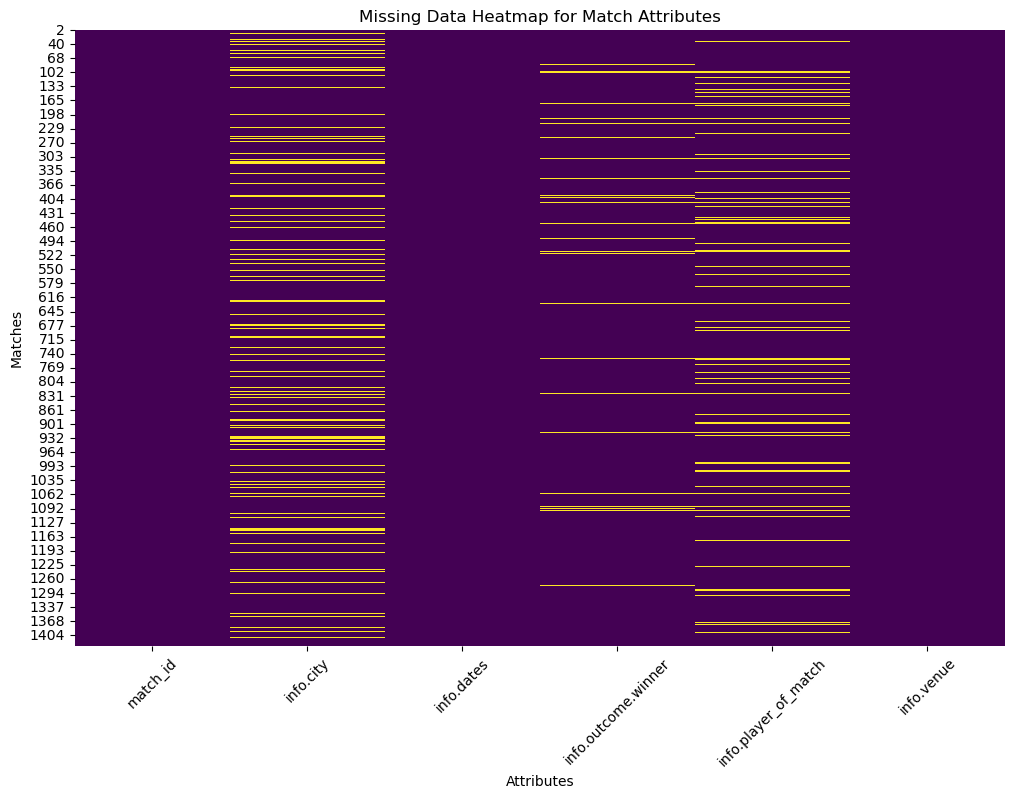

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Extract relevant columns for visualization
visualization_data = matches[['match_id', 'info.city', 'info.dates', 'info.outcome.winner', 'info.player_of_match', 'info.venue']]

# Create a dataframe to indicate presence/absence of data for each attribute in each match
missing_data_indicator = visualization_data.isnull()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(missing_data_indicator, cmap='viridis', cbar=False)
plt.title('Missing Data Heatmap for Match Attributes')
plt.xlabel('Attributes')
plt.ylabel('Matches')
plt.xticks(rotation=45)
plt.show()


In [21]:
# Reset the index of the matches dataframe
matches.reset_index(drop=True, inplace=True)

# Add 1 to the index values to create new match IDs starting from 1
matches['new_match_id'] = matches.index + 1

# Drop the current match_id column
matches.drop(columns=['match_id'], inplace=True)

# Rename the new_match_id column to match_id if needed
matches.rename(columns={'new_match_id': 'match_id'}, inplace=True)

matches


,innings,info.city,info.dates,info.gender,info.outcome.winner,info.player_of_match,info.teams,info.toss.decision,info.toss.winner,info.umpires,info.venue,match_id
0,"[{'1st innings': {'team': 'West Indies', 'deli...",Lauderhill,[2019-08-03],male,India,[NA Saini],"[India, West Indies]",field,India,"[N Duguid, GO Brathwaite]",Central Broward Regional Park Stadium Turf Ground,1
1,"[{'1st innings': {'team': 'West Indies', 'deli...",St Lucia,[2012-03-27],male,Australia,[SR Watson],"[West Indies, Australia]",bat,West Indies,"[GO Brathwaite, PJ Nero]","Beausejour Stadium, Gros Islet",2
2,"[{'1st innings': {'team': 'India', 'deliveries...",Bangalore,[2017-02-01],male,India,[YS Chahal],"[India, England]",field,England,"[AK Chaudhary, Nitin Menon]",M Chinnaswamy Stadium,3
3,"[{'1st innings': {'team': 'England', 'deliveri...",Nottingham,[2009-06-11],male,South Africa,[JH Kallis],"[England, South Africa]",bat,England,"[SJ Davis, AL Hill]",Trent Bridge,4
4,"[{'1st innings': {'team': 'South Africa', 'del...",Cape Town,[2020-12-01],male,England,[DJ Malan],"[South Africa, England]",bat,South Africa,"[A Paleker, BP Jele]",Newlands,5
...,...,...,...,...,...,...,...,...,...,...,...,...
958,"[{'1st innings': {'team': 'Hong Kong', 'delive...",Abu Dhabi,[2017-01-16],male,Oman,[Bilal Khan],"[Hong Kong, Oman]",field,Oman,"[Iftikhar Ali, AJ Neill]",Sheikh Zayed Stadium,959
959,"[{'1st innings': {'team': 'Maldives', 'deliver...",Kuala Lumpur,[2019-06-29],male,Thailand,[N Pathan],"[Maldives, Thailand]",field,Thailand,"[N Sivan, V Kalidas]",Kinrara Academy Oval,960
960,"[{'1st innings': {'team': 'Afghanistan', 'deli...",Chattogram,[2019-09-20],male,Zimbabwe,[CB Mpofu],"[Afghanistan, Zimbabwe]",bat,Afghanistan,"[Sharfuddoula, Tanvir Ahmed]",Zahur Ahmed Chowdhury Stadium,961
961,"[{'1st innings': {'team': 'Canada', 'deliverie...",Hamilton,[2019-08-25],male,Canada,[Ravinderpal Singh],"[Canada, United States of America]",field,United States of America,"[JM Williams, Emmerson Carrington]","White Hill Field, Sandys Parish",962


In [22]:
#Ball by Ball data
matches.iloc[0]['innings'][0]['1st innings']['deliveries']


[{0.1: {'non_striker': 'E Lewis',
   'bowler': 'Washington Sundar',
   'runs': {'extras': 0, 'total': 0, 'batsman': 0},
   'batsman': 'JD Campbell'}},
 {0.2: {'non_striker': 'E Lewis',
   'bowler': 'Washington Sundar',
   'runs': {'extras': 0, 'total': 0, 'batsman': 0},
   'batsman': 'JD Campbell',
   'wicket': {'player_out': 'JD Campbell',
    'fielders': ['KH Pandya'],
    'kind': 'caught'}}},
 {0.3: {'non_striker': 'E Lewis',
   'bowler': 'Washington Sundar',
   'runs': {'extras': 0, 'total': 0, 'batsman': 0},
   'batsman': 'N Pooran'}},
 {0.4: {'non_striker': 'E Lewis',
   'bowler': 'Washington Sundar',
   'runs': {'extras': 0, 'total': 1, 'batsman': 1},
   'batsman': 'N Pooran'}},
 {0.5: {'non_striker': 'N Pooran',
   'bowler': 'Washington Sundar',
   'runs': {'extras': 0, 'total': 0, 'batsman': 0},
   'batsman': 'E Lewis'}},
 {0.6: {'non_striker': 'N Pooran',
   'bowler': 'Washington Sundar',
   'runs': {'extras': 5, 'total': 5, 'batsman': 0},
   'extras': {'wides': 5},
   'batsm

In [23]:
count = -1
delivery_df = pd.DataFrame()
for index, row in matches.iterrows():
    count+=1
    ball_of_match = []
    batsman = []
    bowler = []
    runs = []
    player_of_dismissed = []
    teams = []
    batting_team = []
    match_id = []
    city = []
    venue = []
    for ball in row['innings'][0]['1st innings']['deliveries']:
        for key in ball.keys():
            match_id.append(count)
            batting_team.append(row['innings'][0]['1st innings']['team'])
            teams.append(row['info.teams'])
            ball_of_match.append(key)
            batsman.append(ball[key]['batsman'])
            bowler.append(ball[key]['bowler'])
            runs.append(ball[key]['runs']['total'])
            city.append(row['info.city'])
            venue.append(row['info.venue'])
            try:
                player_of_dismissed.append(ball[key]['wicket']['player_out'])
            except:
                player_of_dismissed.append('0')
    loop_df = pd.DataFrame({
            'match_id':match_id,
            'teams':teams,
            'batting_team':batting_team,
            'ball':ball_of_match,
            'batsman':batsman,
            'bowler':bowler,
            'runs':runs,
            'player_dismissed':player_of_dismissed,
            'city':city,
            'venue':venue
        }) 
    delivery_df=pd.concat([delivery_df,loop_df]) #Add ignore index to get proper no. of rows

In [24]:
delivery_df


,match_id,teams,batting_team,ball,batsman,bowler,runs,player_dismissed,city,venue
0,0,"[India, West Indies]",West Indies,0.1,JD Campbell,Washington Sundar,0,0,Lauderhill,Central Broward Regional Park Stadium Turf Ground
1,0,"[India, West Indies]",West Indies,0.2,JD Campbell,Washington Sundar,0,JD Campbell,Lauderhill,Central Broward Regional Park Stadium Turf Ground
2,0,"[India, West Indies]",West Indies,0.3,N Pooran,Washington Sundar,0,0,Lauderhill,Central Broward Regional Park Stadium Turf Ground
3,0,"[India, West Indies]",West Indies,0.4,N Pooran,Washington Sundar,1,0,Lauderhill,Central Broward Regional Park Stadium Turf Ground
4,0,"[India, West Indies]",West Indies,0.5,E Lewis,Washington Sundar,0,0,Lauderhill,Central Broward Regional Park Stadium Turf Ground
...,...,...,...,...,...,...,...,...,...,...
118,962,"[Pakistan, New Zealand]",Pakistan,19.2,Shaheen Shah Afridi,BM Tickner,1,0,Auckland,Eden Park
119,962,"[Pakistan, New Zealand]",Pakistan,19.3,Faheem Ashraf,BM Tickner,0,Faheem Ashraf,Auckland,Eden Park
120,962,"[Pakistan, New Zealand]",Pakistan,19.4,Shaheen Shah Afridi,BM Tickner,2,0,Auckland,Eden Park
121,962,"[Pakistan, New Zealand]",Pakistan,19.5,Shaheen Shah Afridi,BM Tickner,1,0,Auckland,Eden Park


In [25]:
def bowl_func(row):
    for team in row['teams']:
        if team!=row['batting_team']:
            return team
        

In [26]:
delivery_df['bowling_team']=delivery_df.apply(bowl_func,axis=1)

In [27]:
delivery_df

,match_id,teams,batting_team,ball,batsman,bowler,runs,player_dismissed,city,venue,bowling_team
0,0,"[India, West Indies]",West Indies,0.1,JD Campbell,Washington Sundar,0,0,Lauderhill,Central Broward Regional Park Stadium Turf Ground,India
1,0,"[India, West Indies]",West Indies,0.2,JD Campbell,Washington Sundar,0,JD Campbell,Lauderhill,Central Broward Regional Park Stadium Turf Ground,India
2,0,"[India, West Indies]",West Indies,0.3,N Pooran,Washington Sundar,0,0,Lauderhill,Central Broward Regional Park Stadium Turf Ground,India
3,0,"[India, West Indies]",West Indies,0.4,N Pooran,Washington Sundar,1,0,Lauderhill,Central Broward Regional Park Stadium Turf Ground,India
4,0,"[India, West Indies]",West Indies,0.5,E Lewis,Washington Sundar,0,0,Lauderhill,Central Broward Regional Park Stadium Turf Ground,India
...,...,...,...,...,...,...,...,...,...,...,...
118,962,"[Pakistan, New Zealand]",Pakistan,19.2,Shaheen Shah Afridi,BM Tickner,1,0,Auckland,Eden Park,New Zealand
119,962,"[Pakistan, New Zealand]",Pakistan,19.3,Faheem Ashraf,BM Tickner,0,Faheem Ashraf,Auckland,Eden Park,New Zealand
120,962,"[Pakistan, New Zealand]",Pakistan,19.4,Shaheen Shah Afridi,BM Tickner,2,0,Auckland,Eden Park,New Zealand
121,962,"[Pakistan, New Zealand]",Pakistan,19.5,Shaheen Shah Afridi,BM Tickner,1,0,Auckland,Eden Park,New Zealand


In [28]:
delivery_df.drop(columns=['teams'],inplace=True)

In [29]:
delivery_df['batting_team'].unique()
#For better accuracy teams are taken in such a way that their matches played aare more

array(['West Indies', 'India', 'England', 'South Africa', 'Netherlands',
       'New Zealand', 'Afghanistan', 'Pakistan', 'Kenya', 'Australia',
       'Malaysia', 'Ireland', 'Zimbabwe', 'Nigeria', 'Singapore', 'Nepal',
       'Bangladesh', 'Vanuatu', 'Hong Kong', 'United Arab Emirates',
       'Thailand', 'Canada', 'Sri Lanka', 'Papua New Guinea', 'Spain',
       'Scotland', 'Belgium', 'Oman', 'Kuwait', 'Jersey', 'Gibraltar',
       'Denmark', 'Cayman Islands', 'United States of America',
       'Philippines', 'Ghana', 'Guernsey', 'Namibia', 'Bermuda', 'Qatar',
       'Germany', 'Botswana', 'Italy', 'Romania', 'Norway', 'Isle of Man',
       'Uganda', 'Maldives', 'Bulgaria', 'Iran', 'Bhutan', 'Portugal'],
      dtype=object)

In [30]:
teams=['India',
       'Australia',
       'England',
       'New Zealand',
       'West Indies',
       'Pakistan',
       'Bangladesh',
       'South Africa',
       'Afghanistan',
       'Sri Lanka'
    ]

In [31]:
delivery_df=delivery_df[delivery_df['batting_team'].isin(teams)]
delivery_df=delivery_df[delivery_df['bowling_team'].isin(teams)]

In [32]:
delivery_df

,match_id,batting_team,ball,batsman,bowler,runs,player_dismissed,city,venue,bowling_team
0,0,West Indies,0.1,JD Campbell,Washington Sundar,0,0,Lauderhill,Central Broward Regional Park Stadium Turf Ground,India
1,0,West Indies,0.2,JD Campbell,Washington Sundar,0,JD Campbell,Lauderhill,Central Broward Regional Park Stadium Turf Ground,India
2,0,West Indies,0.3,N Pooran,Washington Sundar,0,0,Lauderhill,Central Broward Regional Park Stadium Turf Ground,India
3,0,West Indies,0.4,N Pooran,Washington Sundar,1,0,Lauderhill,Central Broward Regional Park Stadium Turf Ground,India
4,0,West Indies,0.5,E Lewis,Washington Sundar,0,0,Lauderhill,Central Broward Regional Park Stadium Turf Ground,India
...,...,...,...,...,...,...,...,...,...,...
118,962,Pakistan,19.2,Shaheen Shah Afridi,BM Tickner,1,0,Auckland,Eden Park,New Zealand
119,962,Pakistan,19.3,Faheem Ashraf,BM Tickner,0,Faheem Ashraf,Auckland,Eden Park,New Zealand
120,962,Pakistan,19.4,Shaheen Shah Afridi,BM Tickner,2,0,Auckland,Eden Park,New Zealand
121,962,Pakistan,19.5,Shaheen Shah Afridi,BM Tickner,1,0,Auckland,Eden Park,New Zealand


In [33]:
output=delivery_df[['match_id','batting_team','bowling_team','ball','runs','player_dismissed','city','venue']]
output

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue
0,0,West Indies,India,0.1,0,0,Lauderhill,Central Broward Regional Park Stadium Turf Ground
1,0,West Indies,India,0.2,0,JD Campbell,Lauderhill,Central Broward Regional Park Stadium Turf Ground
2,0,West Indies,India,0.3,0,0,Lauderhill,Central Broward Regional Park Stadium Turf Ground
3,0,West Indies,India,0.4,1,0,Lauderhill,Central Broward Regional Park Stadium Turf Ground
4,0,West Indies,India,0.5,0,0,Lauderhill,Central Broward Regional Park Stadium Turf Ground
...,...,...,...,...,...,...,...,...
118,962,Pakistan,New Zealand,19.2,1,0,Auckland,Eden Park
119,962,Pakistan,New Zealand,19.3,0,Faheem Ashraf,Auckland,Eden Park
120,962,Pakistan,New Zealand,19.4,2,0,Auckland,Eden Park
121,962,Pakistan,New Zealand,19.5,1,0,Auckland,Eden Park


In [34]:
pickle.dump(output,open('dataset_level2.pk1','wb'))